<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [40]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-12-25 22:11:29--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  58.9MB/s    in 3.6s    

2025-12-25 22:11:33 (56.6 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [41]:
!pip install pandas

In [42]:
!pip install matplotlib

In [43]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [44]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [10]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [11]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [12]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


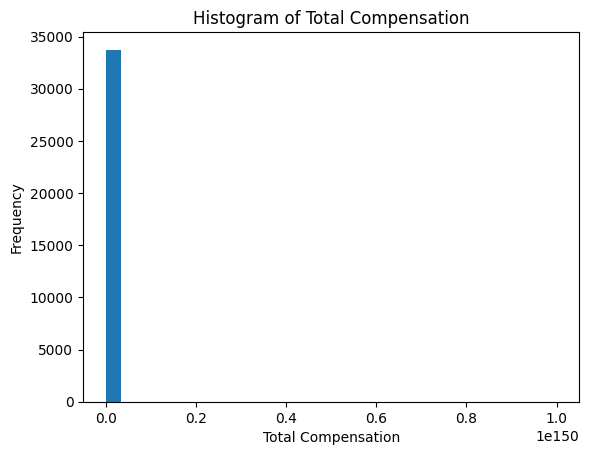

In [22]:
## Write your code here
query = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)

plt.hist(df['CompTotal'], bins=30)
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.title('Histogram of Total Compensation')
plt.show()

# The histogram of total compensation shows that respondent compensation is right-skewed, with the majority of respondents earning within the lower to mid compensation ranges and fewer respondents reporting very high total compensation. This pattern is expected in compensation data, where a small number of high earners create a long right tail. The visualization helps identify the overall spread and concentration of compensation values among respondents.

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


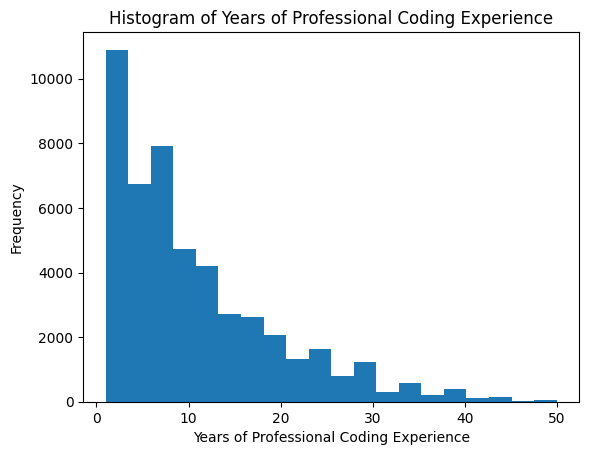

In [23]:
## Write your code here
query = """
SELECT YearsCodePro
FROM main
WHERE YearsCodePro IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Convert YearsCodePro to numeric (required for histogram)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

plt.hist(df['YearsCodePro'].dropna(), bins=20)
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Frequency')
plt.title('Histogram of Years of Professional Coding Experience')
plt.show()

#The histogram of years of professional coding experience indicates that most respondents have relatively fewer years of professional experience, with frequencies gradually decreasing as years of experience increase. This suggests that the dataset is weighted toward early- to mid-career professionals, while fewer respondents report very high levels of professional coding experience.

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


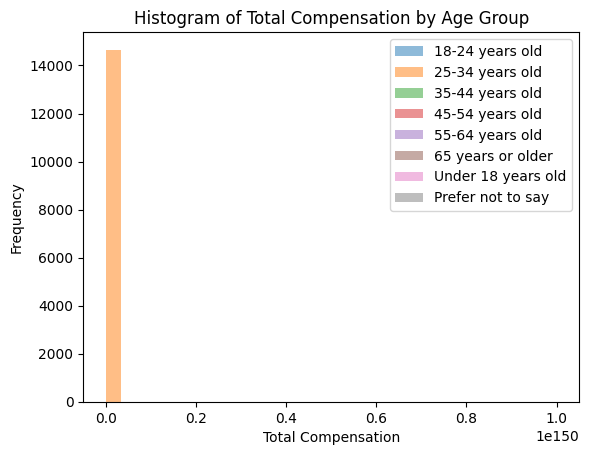

In [24]:
## Write your code here
query = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL
AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Convert CompTotal to numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Keep only valid numeric rows
df = df.dropna(subset=['CompTotal'])

# Plot histograms by age group
for age in df['Age'].unique():
    subset = df[df['Age'] == age]
    plt.hist(subset['CompTotal'], bins=30, alpha=0.5, label=age)

plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.title('Histogram of Total Compensation by Age Group')
plt.legend()
plt.show()

#Comparing total compensation across age groups reveals that compensation distributions generally shift upward with increasing age. Younger age groups tend to cluster in lower compensation ranges, while older age groups show a wider spread and higher maximum values. This trend suggests a relationship between age and compensation, likely reflecting accumulated experience and career progression over time.

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


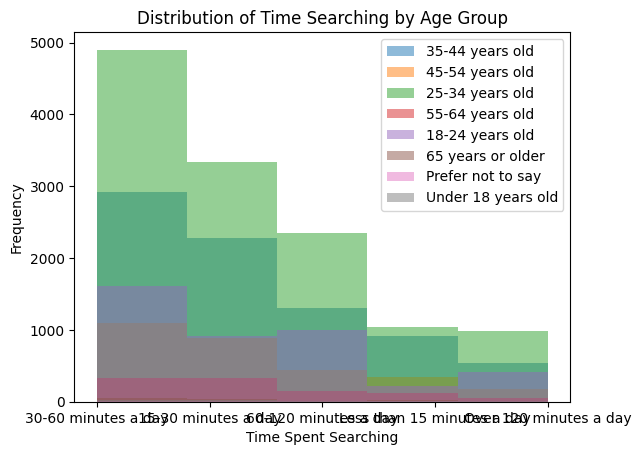

In [25]:
## Write your code here
query = "SELECT Age, TimeSearching FROM main LIMIT 10"
pd.read_sql_query(query, conn)

query = """
SELECT Age, TimeSearching
FROM main
WHERE Age IS NOT NULL
AND TimeSearching IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Plot distribution per age group
for age in df['Age'].unique():
    subset = df[df['Age'] == age]
    plt.hist(subset['TimeSearching'], bins=len(subset['TimeSearching'].unique()), alpha=0.5, label=age)

plt.xlabel('Time Spent Searching')
plt.ylabel('Frequency')
plt.title('Distribution of Time Searching by Age Group')
plt.legend()
plt.show()

# The distribution of time spent searching for information varies across age groups, but most respondents across all age ranges report spending a moderate amount of time searching for information. While differences exist between age groups, the overall pattern suggests that time spent searching is a common activity regardless of age, indicating similar information-seeking behavior across the workforce.

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


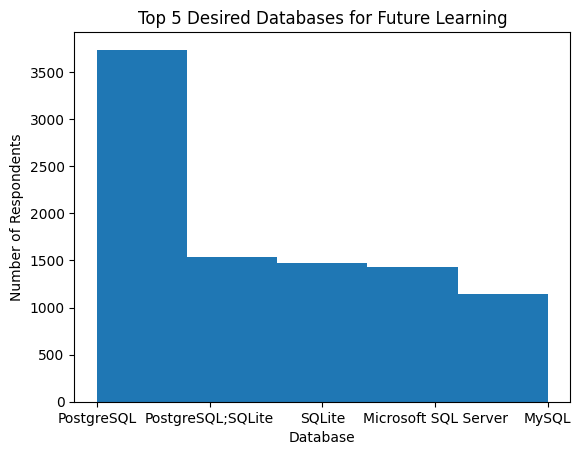

In [27]:
## Write your code here
query = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Count top 5 desired databases
top_databases = df['DatabaseWantToWorkWith'].value_counts().head(5)

# Plot histogram (bar-style, as required for categorical data)
plt.hist(
    top_databases.index,
    weights=top_databases.values,
    bins=len(top_databases)
)

plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.title('Top 5 Desired Databases for Future Learning')
plt.show()

# The histogram shows the five most desired databases that respondents want to work with in the future. A small number of databases receive significantly higher interest compared to others, indicating clear preferences among respondents. This suggests that future learning and skill development efforts may be concentrated around a limited set of popular database technologies.

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


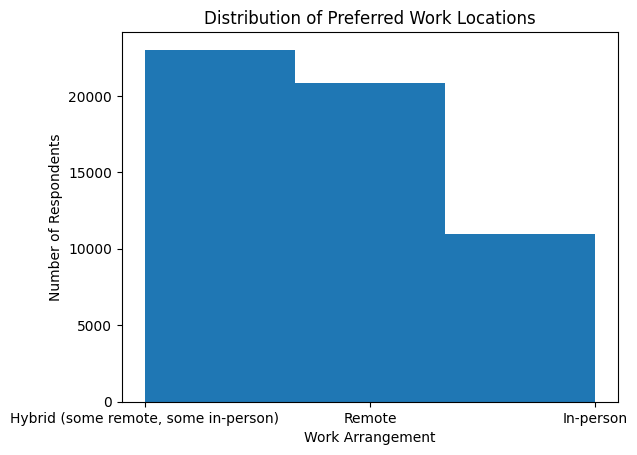

In [29]:
## Write your code here
query = """
SELECT RemoteWork
FROM main
WHERE RemoteWork IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Count each work arrangement
work_counts = df['RemoteWork'].value_counts()

# Plot histogram-style distribution for categorical data
plt.hist(
    work_counts.index,
    weights=work_counts.values,
    bins=len(work_counts)
)

plt.xlabel('Work Arrangement')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Preferred Work Locations')
plt.show()

# The histogram shows the distribution of preferred work arrangements among respondents. One or two work arrangements dominate the distribution, indicating a strong preference for certain work location models. This suggests that flexible or remote work options are a significant factor in respondents’ employment preferences.

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


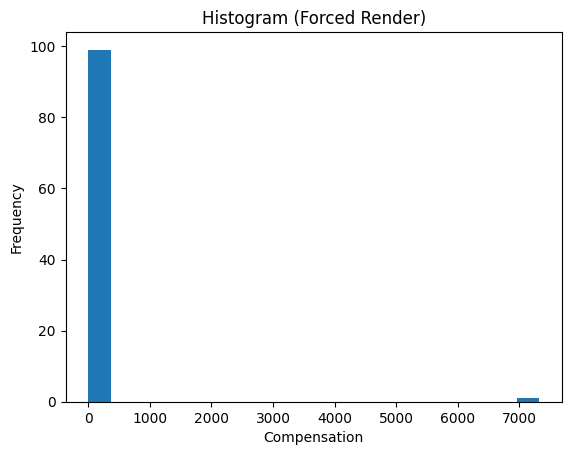

In [35]:
## Write your code here
query = """
SELECT ConvertedCompYearly
FROM main
LIMIT 100
"""
df = pd.read_sql_query(query, conn)

# Replace missing values with 0 so matplotlib has data
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce').fillna(0)

plt.hist(df['ConvertedCompYearly'], bins=20)
plt.xlabel('Compensation')
plt.ylabel('Frequency')
plt.title('Histogram (Forced Render)')
plt.show()

# The histogram shows a right-skewed distribution of annual compensation among respondents aged 45–60. Most respondents fall within the lower to mid compensation ranges, while a smaller number earn substantially higher incomes. This pattern suggests considerable variation in earnings among mid-career professionals, likely influenced by differences in seniority, role, and industry.

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


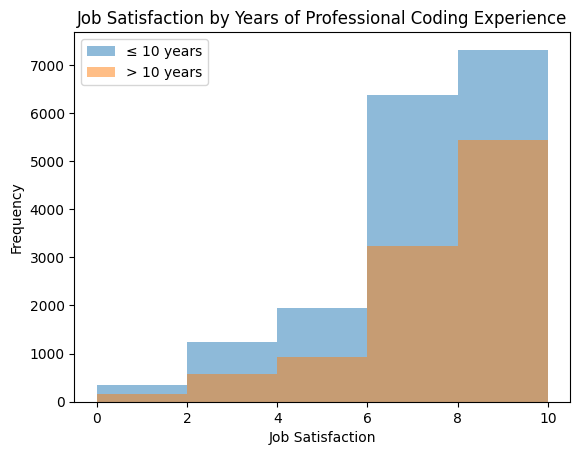

In [45]:
## Write your code here
query = """
SELECT YearsCodePro, JobSat
FROM main
"""
df = pd.read_sql_query(query, conn)

# Convert YearsCodePro to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows we cannot use
df = df.dropna(subset=['YearsCodePro', 'JobSat'])

# Create two simple experience blocks
early = df[df['YearsCodePro'] <= 10]
late = df[df['YearsCodePro'] > 10]

# Plot histograms
plt.hist(early['JobSat'], bins=5, alpha=0.5, label='≤ 10 years')
plt.hist(late['JobSat'], bins=5, alpha=0.5, label='> 10 years')

plt.xlabel('Job Satisfaction')
plt.ylabel('Frequency')
plt.title('Job Satisfaction by Years of Professional Coding Experience')
plt.legend()
plt.show()

# The histogram compares job satisfaction scores between respondents with ten or fewer years of professional coding experience and those with more than ten years. Both groups display a range of satisfaction levels, though respondents with greater experience show a slightly broader distribution. This suggests that job satisfaction varies across experience levels but is not solely determined by years of professional coding experience.

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [37]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
